In [1]:
import pandas as pd
import kaggle
import auto_co2 as co2
import importlib
importlib.reload(co2)

<module 'auto_co2' from '/home/mln/GIT/car-co2-prediction_pre-release/src/auto_co2/__init__.py'>

In [ ]:


auth_file_path = '/home/mln/.kaggle/kaggle.json'
filename = 'test.csv'  # replace with the actual name of the csv file in the zip

df = co2.download_and_load_co2_data(auth_file_path)
df.head()

df = co2.data.load_co2_data()
df = co2.data.convert_dtypes(df)

sample = df.sample(1000)
sample.to_csv('data/sample.csv', index=False)

In [2]:
df = pd.read_csv('data/sample.csv')

df = co2.data.select_countries(df, ['DK', 'NL', 'LU', 'BE'])

In [3]:
df = co2.data.rename_columns(df)
co2.styles.displayer(df, 10)

,ID,Country,VehicleFamilyIdentification,Pool,ManufacturerName,ManufNameOem,ManufNameMS,TypeApprovalNumber,Type,Variant,Version,Make,CommercialName,VehicleCategory,CategoryOf,TotalNewRegistrations,MassRunningOrder,WltpTestMass,Co2EmissionsNedc,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,AxleWidthOther,FuelType,FuelMode,EngineCapacity,EnginePower,ElectricConsumption,InnovativeTechnology,InnovativeEmissionsReduction,InnovativeEmissionsReductionWltp,DeviationFactor,VerificationFactor,Status,RegistrationYear,RegistrationDate,FuelConsumption,ElectricRange
0,57524960,NL,IP-2019_536L4D-YV1-1,nan,VOLVO,VOLVO CAR CORPORATION,nan,E9*2007/46*3146*12,X,XZL4,XZL4VD0?,VOLVO,XC40,M1,M1,1,1625.000,1770.000,nan,168.000,2700.000,1600.000,1630.000,PETROL,M,1477.000,95.000,nan,nan,nan,nan,nan,nan,P,2021,nan,nan,nan
1,57353112,NL,IP-HNP____MB6F2427-VF3-0,STELLANTIS,AUTOMOBILES PEUGEOT,AUTOMOBILES PEUGEOT,nan,E2*2007/46*0405*31,L,P,HNPJ-C12A00,PEUGEOT,308,M1,M1,1,1278.000,1423.000,nan,124.000,2620.000,1560.000,1560.000,PETROL,M,1199.000,81.000,nan,e2 29,nan,1.300,nan,nan,P,2021,nan,nan,nan
2,57435744,NL,IP-MQB37WZ_A2_0575-WAU-1,VW-SAIC,AUDI AG,AUDI AG,nan,E1*2007/46*2060*12,GY,LDFYAF1,FD7FD7CW002RT011B174BIAEM1MLN1B20,AUDI,A3 LIMOUSINE,M1,M1,1,1395.000,1505.000,nan,127.000,2620.000,1540.000,1530.000,PETROL,H,1498.000,110.000,nan,nan,nan,nan,nan,nan,P,2021,nan,nan,nan
3,57249792,NL,IP-050045-KNA-01,KIA,KIA,KIA CORPORATION,nan,E5*2007/46*1078*03,JA,F4P71,M53DZ1,KIA,PICANTO,M1,M1,1,974.000,1090.000,nan,110.000,2400.000,1390.000,1400.000,PETROL,M,998.000,49.000,nan,nan,nan,nan,nan,nan,P,2021,nan,nan,nan
4,56560176,BE,IP-JBA1M6PJT4A_000-VF1-1,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,nan,E2*2007/46*0684*11,RJB,HE2,M66UA1AA5200,RENAULT,CAPTUR,M1,M1,1,1280.000,1385.000,nan,133.000,2639.000,1554.000,1541.000,PETROL,M,999.000,67.000,nan,e9 28 29,nan,2.600,nan,nan,P,2021,2021-10-12,5.300,nan
5,57418304,NL,IP-2018_1437-WDB-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,nan,E1*2007/46*1829*13,F2A,X0H9T2,FZAA151A,MERCEDES-BENZ,A 180,M1,M1,1,1380.000,1494.000,nan,135.000,2730.000,1570.000,1560.000,PETROL,M,1332.000,100.000,nan,e1 29,nan,1.200,nan,nan,P,2021,nan,nan,nan
6,57368688,NL,IP-HNP____AT6_1433-VF7-0,STELLANTIS,AUTOMOBILES CITROEN,AUTOMOBILES CITROEN,nan,E2*2007/46*0003*65,S,XHNP,Y/AAXS,CITROEN,C3,M1,M1,1,1165.000,1312.000,nan,135.000,2540.000,1480.000,1480.000,PETROL,M,1199.000,81.000,nan,e2 28 29,nan,2.000,nan,nan,P,2021,nan,nan,nan
7,57334652,NL,IP-JFB1MTGJT4A_000-UU1-0,RENAULT-NISSAN-MITSUBISHI,DACIA,AUTOMOBILE DACIA SA,nan,E19*2007/46*0026*04,DJF,BEV,MT6UA35M5200,DACIA,SANDERO,M1,M1,1,1229.000,1309.000,nan,115.000,2600.000,1520.000,1520.000,LPG,B,999.000,74.000,nan,nan,nan,nan,nan,nan,P,2021,nan,nan,nan
8,44992612,LU,IP-09_1950-5YJ-1,TESLA,TESLA,TESLA INC,nan,E4*2007/46*1293*15,003,E5D,BGB1S5T1,TESLA,MODEL 3,M1,M1,1,1919.000,2258.000,0.000,0.000,2875.000,1580.000,1580.000,ELECTRIC,E,nan,153.000,148.000,nan,nan,nan,nan,nan,P,2021,nan,nan,580.000
9,57430368,NL,IP-MEB31AZ_A0_0957-WAU-1,VW-SAIC,AUDI AG,AUDI AG,nan,E1*2018/858*00006*02,FZ,XBL1EH1,HE1HE1G1Z01RT011A190GAAEM0O,AUDI,Q4 35 E-TRON,M1,M1,1,1965.000,2062.000,0.000,0.000,2770.000,1590.000,1570.000,ELECTRIC,E,nan,125.000,174.000,nan,nan,nan,nan,nan,P,2021,nan,nan,335.000


In [4]:
co2.styles.display_na(df)

,Colonne,Valeurs manquantes (%)
0,VerificationFactor,100.00%
1,ManufNameMS,100.00%
2,InnovativeEmissionsReduction,100.00%
3,DeviationFactor,100.00%
4,ElectricConsumption,79.40%
5,ElectricRange,78.30%
6,FuelConsumption,69.90%
7,InnovativeEmissionsReductionWltp,65.80%
8,InnovativeTechnology,63.10%
9,Co2EmissionsNedc,61.40%


In [5]:
co2.styles.display_describe(df)

,Colonne,count,mean,std,min,25%,50%,75%,max
0,ID,1000.000,53215423.644,6731030.278,40328060.000,56399619.000,56627730.000,57326010.000,57532772.000
1,ManufNameMS,0.000,nan,nan,nan,nan,nan,nan,nan
2,TotalNewRegistrations,1000.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
3,MassRunningOrder,1000.000,1516.165,355.227,915.000,1256.250,1451.000,1760.000,2690.000
4,WltpTestMass,997.000,1636.216,367.798,993.000,1360.000,1573.000,1896.000,3019.000
5,Co2EmissionsNedc,386.000,52.316,50.671,0.000,0.000,36.000,106.000,225.000
6,Co2EmissionsWltp,998.000,103.664,54.939,0.000,56.000,122.000,138.000,296.000
7,BaseWheel,1000.000,2671.300,159.378,2300.000,2577.500,2670.000,2770.000,4395.000
8,AxleWidthSteering,903.000,1553.004,57.062,1385.000,1520.000,1560.000,1590.000,1750.000
9,AxleWidthOther,903.000,1552.161,61.348,1365.000,1518.000,1560.000,1590.000,1732.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                1000 non-null   int64  
 1   Country                           1000 non-null   object 
 2   VehicleFamilyIdentification       781 non-null    object 
 3   Pool                              956 non-null    object 
 4   ManufacturerName                  1000 non-null   object 
 5   ManufNameOem                      1000 non-null   object 
 6   ManufNameMS                       0 non-null      float64
 7   TypeApprovalNumber                1000 non-null   object 
 8   Type                              1000 non-null   object 
 9   Variant                           998 non-null    object 
 10  Version                           998 non-null    object 
 11  Make                              1000 non-null   object 
 12  Commerc

In [7]:
df = co2.data.convert_dtypes(df)
co2.styles.display_info(df)

,Column,Non-Null Count,Dtype
0,ID,1000 non-null,int64
1,Country,1000 non-null,object
2,VehicleFamilyIdentification,781 non-null,object
3,Pool,956 non-null,object
4,ManufacturerName,1000 non-null,object
5,ManufNameOem,1000 non-null,object
6,ManufNameMS,0 non-null,float64
7,TypeApprovalNumber,1000 non-null,object
8,Type,1000 non-null,object
9,Variant,998 non-null,object


,Info
0,"RangeIndex: 1000 entries, 0 to 999"
1,Data columns (total 38 columns):
2,37 ElectricRange 217 non-null float64
3,"dtypes: float64(17), int64(3), object(18)"
4,memory usage: 297.0+ KB


In [8]:
df.columns

Index(['ID', 'Country', 'VehicleFamilyIdentification', 'Pool',
       'ManufacturerName', 'ManufNameOem', 'ManufNameMS', 'TypeApprovalNumber',
       'Type', 'Variant', 'Version', 'Make', 'CommercialName',
       'VehicleCategory', 'CategoryOf', 'TotalNewRegistrations',
       'MassRunningOrder', 'WltpTestMass', 'Co2EmissionsNedc',
       'Co2EmissionsWltp', 'BaseWheel', 'AxleWidthSteering', 'AxleWidthOther',
       'FuelType', 'FuelMode', 'EngineCapacity', 'EnginePower',
       'ElectricConsumption', 'InnovativeTechnology',
       'InnovativeEmissionsReduction', 'InnovativeEmissionsReductionWltp',
       'DeviationFactor', 'VerificationFactor', 'Status', 'RegistrationYear',
       'RegistrationDate', 'FuelConsumption', 'ElectricRange'],
      dtype='object')

In [9]:
df = co2.data.drop_irrelevant_columns(df)
co2.styles.displayer(df)

,ID,Country,Pool,ManufacturerName,ManufNameOem,Make,CategoryOf,MassRunningOrder,WltpTestMass,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,FuelType,FuelMode,EngineCapacity,EnginePower,ElectricConsumption,InnovativeTechnology,InnovativeEmissionsReductionWltp,RegistrationDate,FuelConsumption,ElectricRange
0,57524960,NL,nan,VOLVO,VOLVO CAR CORPORATION,VOLVO,M1,1625.000,1770.000,168.000,2700.000,1600.000,PETROL,M,1477.000,95.000,nan,nan,nan,nan,nan,nan
1,57353112,NL,STELLANTIS,AUTOMOBILES PEUGEOT,AUTOMOBILES PEUGEOT,PEUGEOT,M1,1278.000,1423.000,124.000,2620.000,1560.000,PETROL,M,1199.000,81.000,nan,e2 29,1.300,nan,nan,nan
2,57435744,NL,VW-SAIC,AUDI AG,AUDI AG,AUDI,M1,1395.000,1505.000,127.000,2620.000,1540.000,PETROL,H,1498.000,110.000,nan,nan,nan,nan,nan,nan
3,57249792,NL,KIA,KIA,KIA CORPORATION,KIA,M1,974.000,1090.000,110.000,2400.000,1390.000,PETROL,M,998.000,49.000,nan,nan,nan,nan,nan,nan
4,56560176,BE,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,RENAULT,M1,1280.000,1385.000,133.000,2639.000,1554.000,PETROL,M,999.000,67.000,nan,e9 28 29,2.600,2021-10-12,5.300,nan


In [10]:
df['Pool'].value_counts()

Pool
VW-SAIC                       254
STELLANTIS                    205
RENAULT-NISSAN-MITSUBISHI      90
MAZDA-SUBARU-SUZUKI-TOYOTA     87
BMW                            82
KIA                            67
MERCEDES-BENZ                  62
FORD                           48
HYUNDAI                        37
TESLA                          24
Name: count, dtype: int64

In [11]:
df['Make'].isna().sum()

0

In [12]:
df = df.dropna(subset='Pool')
def conditional_column_update(df, condition_column, condition_value, target_column, target_value):
    df.loc[df[condition_column] == condition_value, target_column] = target_value
    return df

In [13]:
co2.styles.displayer(df)

,ID,Country,Pool,ManufacturerName,ManufNameOem,Make,CategoryOf,MassRunningOrder,WltpTestMass,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,FuelType,FuelMode,EngineCapacity,EnginePower,ElectricConsumption,InnovativeTechnology,InnovativeEmissionsReductionWltp,RegistrationDate,FuelConsumption,ElectricRange
1,57353112,NL,STELLANTIS,AUTOMOBILES PEUGEOT,AUTOMOBILES PEUGEOT,PEUGEOT,M1,1278.000,1423.000,124.000,2620.000,1560.000,PETROL,M,1199.000,81.000,nan,e2 29,1.300,nan,nan,nan
2,57435744,NL,VW-SAIC,AUDI AG,AUDI AG,AUDI,M1,1395.000,1505.000,127.000,2620.000,1540.000,PETROL,H,1498.000,110.000,nan,nan,nan,nan,nan,nan
3,57249792,NL,KIA,KIA,KIA CORPORATION,KIA,M1,974.000,1090.000,110.000,2400.000,1390.000,PETROL,M,998.000,49.000,nan,nan,nan,nan,nan,nan
4,56560176,BE,RENAULT-NISSAN-MITSUBISHI,RENAULT,RENAULT SAS,RENAULT,M1,1280.000,1385.000,133.000,2639.000,1554.000,PETROL,M,999.000,67.000,nan,e9 28 29,2.600,2021-10-12,5.300,nan
5,57418304,NL,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,MERCEDES-BENZ,M1,1380.000,1494.000,135.000,2730.000,1570.000,PETROL,M,1332.000,100.000,nan,e1 29,1.200,nan,nan,nan


In [14]:
df.loc[(df['Pool'] == 'Tesla'), 'Make'].unique()

array([], dtype=object)

In [15]:
from auto_co2.data import clean_manufacturer_columns
makers = co2.agg.Manufacturers(clean_manufacturer_columns(df))

In [16]:
makers.display()

In [17]:
#coutry_stats = agg.get_country_stats()
#display(coutry_stats)
country_stats = {
 'IE': {'population': 5123536, 'gdp_per_capita': 103296.79936336935},
 'HU': {'population': 9603634, 'gdp_per_capita': 18.935334502543515},
 'ES': {'population': 47415750, 'gdp_per_capita': 30103.513733200467},
 'BE': {'population': 11584008, 'gdp_per_capita': 51785.18523122567},
 'LU': {'population': 660809, 'gdp_per_capita': 129396.30639715864},
 'FI': {'population': 5563970, 'gdp_per_capita': 53269.09118201572},
 'SE': {'population': 10548336, 'gdp_per_capita': 60375.042698298574},
 'DK': {'population': 5827463, 'gdp_per_capita': 68349.34391930074},
 'PL': {'population': 38382576, 'gdp_per_capita': 17929.40124589345},
 'LT': {'population': 2860002, 'gdp_per_capita': 24592.39504308039},
 'IT': {'population': 58850717, 'gdp_per_capita': 35927.442598770715},
 'AT': {'population': 8979894, 'gdp_per_capita': 53493.772186286384},
 'GR': {'population': 10482487, 'gdp_per_capita': 20898.272753975274},
 'PT': {'population': 10347892, 'gdp_per_capita': 24544.40455804912},
 'FR': {'population': 67749632, 'gdp_per_capita': 43658.97897812936},
 'GB': {'population': 67326569, 'gdp_per_capita': 46378.1296493068},
 'DE': {'population': 83149300, 'gdp_per_capita': 51232.36048676297},
 'EE': {'population': 1373101, 'gdp_per_capita': 27748.00466899376},
 'LV': {'population': 1883008, 'gdp_per_capita': 21855.4104193928},
 'CZ': {'population': 10827529, 'gdp_per_capita': 23152.189202171612},
 'SK': {'population': 5449270, 'gdp_per_capita': 21774.768346769382},
 'SI': {'population': 2066880, 'gdp_per_capita': 30053.882187161325},
 'RO': {'population': 19053815, 'gdp_per_capita': 15811.089953586723},
 'BG': {'population': 7000039, 'gdp_per_capita': 12719.986046649168},
 'HR': {'population': 3871833, 'gdp_per_capita': 18328.426475263783},
 'CY': {'population': 1141166, 'gdp_per_capita': 24921.04806925548},
 'MT': {'population': 465292, 'gdp_per_capita': 38180.90578604403},
 'NL': {'population': 17100715, 'gdp_per_capita': 48569.46734975701}}



In [18]:
countries = co2.agg.Countries(df, country_stats)  
countries.display()

,Country,population,gdp_per_capita,Count,Make,FuelType,FuelConsumption,EnginePower,Co2EmissionsWltp,MassRunningOrder,BaseWheel,AxleWidthSteering
0,BE,11584008.000,51785.185,391,BMW,PETROL,4.902,105.248,119.369,1498.194,2682.826,1558.201
1,DK,5827463.000,68349.344,193,VOLKSWAGEN,PETROL,nan,110.052,92.453,1554.637,2664.990,1552.000
2,LU,660809.000,129396.306,37,VOLKSWAGEN,PETROL,nan,118.162,117.595,1510.297,2719.054,1561.676
3,NL,17100715.000,48569.467,335,VOLKSWAGEN,PETROL,nan,100.997,92.916,1460.696,2636.925,1539.821


In [19]:

co2.viz.countrywise_viz(countries)

In [20]:
co2.viz.plot_registrations_per_month(df, filename="my_plot", format='json')


In [21]:
co2.viz.load_plotly_json('my_plot.json')   

In [22]:
co2.viz.plot_registrations_per_month(df)

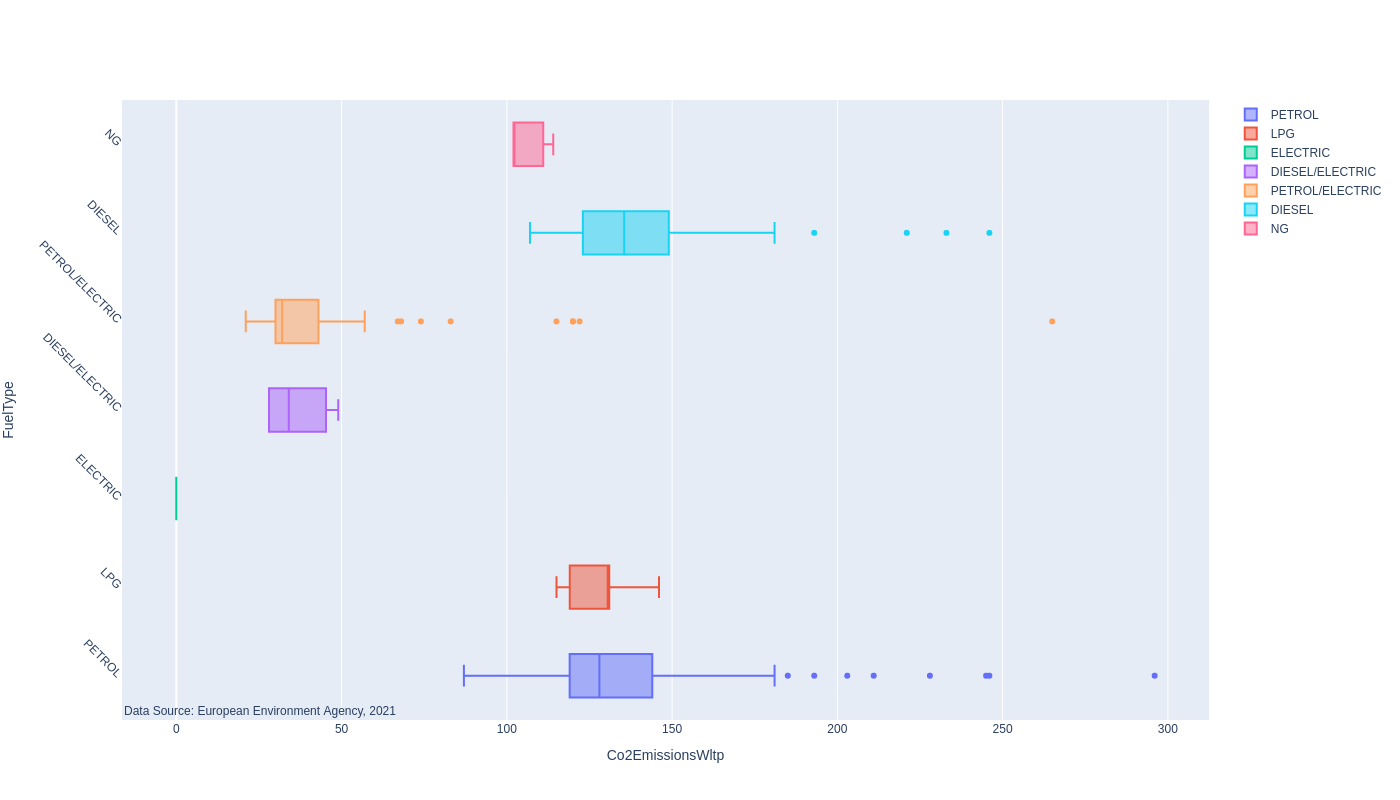

In [23]:
co2.viz.plot_fueltype_distribution(df, interactive=False, filename=None, format='html')

In [24]:
co2.viz.plot_heatmap(df.drop(columns=['ID', 'FuelConsumption', 'Month']))

In [25]:
def column_remover(df, columns=None):
    columns_to_drop = ['Country', 'Type', 'Variant', 'Version', 'Make', 'CommercialName', 'VehicleCategory',
                        'TotalNewRegistrations', 'Co2EmissionsNedc', 'WltpTestMass','FuelMode', 
                        'ElectricConsumption', 'InnovativeEmissionsReduction', 'DeviationFactor', 
                        'VerificationFactor', 'Status','RegistrationYear', 'RegistrationDate',
                        'Pool', 'CategoryOf']
    if columns is None:
        df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    else:
        df = df.drop(columns=[col for col in columns if col in df.columns])
    
    return df


def correct_fueltype(df):
    df.loc[df['FuelType'] == 'petrol/electric', 'FuelType'] = 'PETROL/ELECTRIC'
    df.loc[df['FuelType'] == 'E85', 'FuelType'] = 'ETHANOL'
    df.loc[df['FuelType'] == 'NG-BIOMETHANE', 'FuelType'] = 'NATURALGAS'
    return df

def remove_fueltype(df, keep_fossil=False):
    if keep_fossil:
        df = df.drop(columns=['FuelType'])
    else:
        df.drop(df.loc[df['FuelType'].isin(['HYDROGEN', 'ELECTRIC', 'UNKNOWN'])].index, inplace=True)
    return df

def standardize_innovtech(df, drop=True):
    if drop:
        df = df.drop(columns=['InnovativeTechnology'])
    else:
        df['InnovativeTechnology'].fillna(0, inplace=True)
        df.loc[df['InnovativeTechnology'] != 0, 'InnovativeTechnology'] = 1
        df['InnovativeTechnology'] = df['InnovativeTechnology'].astype(int)
    return df
    
    
def drop_residual_incomplete_rows(df):
    rows_t0 = len(df)
    for col in df.columns:
        if df[col].isna().mean() <= 0.05:
            df = df[df[col].notna()]

    rows_t1 = len(df)
    print(f"Number of rows dropped:{rows_t0 - rows_t1}")
    return df
    
    
def ml_preprocessing(df):
    df = column_remover(df)
    df = remove_fueltype(df)
    df = standardize_innovtech(df)
    df = drop_residual_incomplete_rows(df)
    return df


    

In [26]:
df = ml_preprocessing(df)
co2.styles.displayer(df, 5)

Number of rows dropped:42


,ID,ManufacturerName,ManufNameOem,MassRunningOrder,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,FuelType,EngineCapacity,EnginePower,InnovativeEmissionsReductionWltp,FuelConsumption,ElectricRange,Month
1,57353112,AUTOMOBILES PEUGEOT,AUTOMOBILES PEUGEOT,1278.000,124.000,2620.000,1560.000,PETROL,1199.000,81.000,1.300,nan,nan,nan
2,57435744,AUDI AG,AUDI AG,1395.000,127.000,2620.000,1540.000,PETROL,1498.000,110.000,nan,nan,nan,nan
3,57249792,KIA,KIA CORPORATION,974.000,110.000,2400.000,1390.000,PETROL,998.000,49.000,nan,nan,nan,nan
4,56560176,RENAULT,RENAULT SAS,1280.000,133.000,2639.000,1554.000,PETROL,999.000,67.000,2.600,5.300,nan,10.000
5,57418304,MERCEDES-BENZ AG,MERCEDES-BENZ AG,1380.000,135.000,2730.000,1570.000,PETROL,1332.000,100.000,1.200,nan,nan,nan


In [27]:
co2.styles.display_na(df)

,Colonne,Valeurs manquantes (%)
0,ElectricRange,89.42%
1,FuelConsumption,67.00%
2,Month,58.06%
3,InnovativeEmissionsReductionWltp,57.93%
4,AxleWidthSteering,11.21%
5,ID,0.00%
6,BaseWheel,0.00%
7,Co2EmissionsWltp,0.00%
8,MassRunningOrder,0.00%
9,ManufNameOem,0.00%


In [28]:
co2.viz.plot_qqplots(df, interactive=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

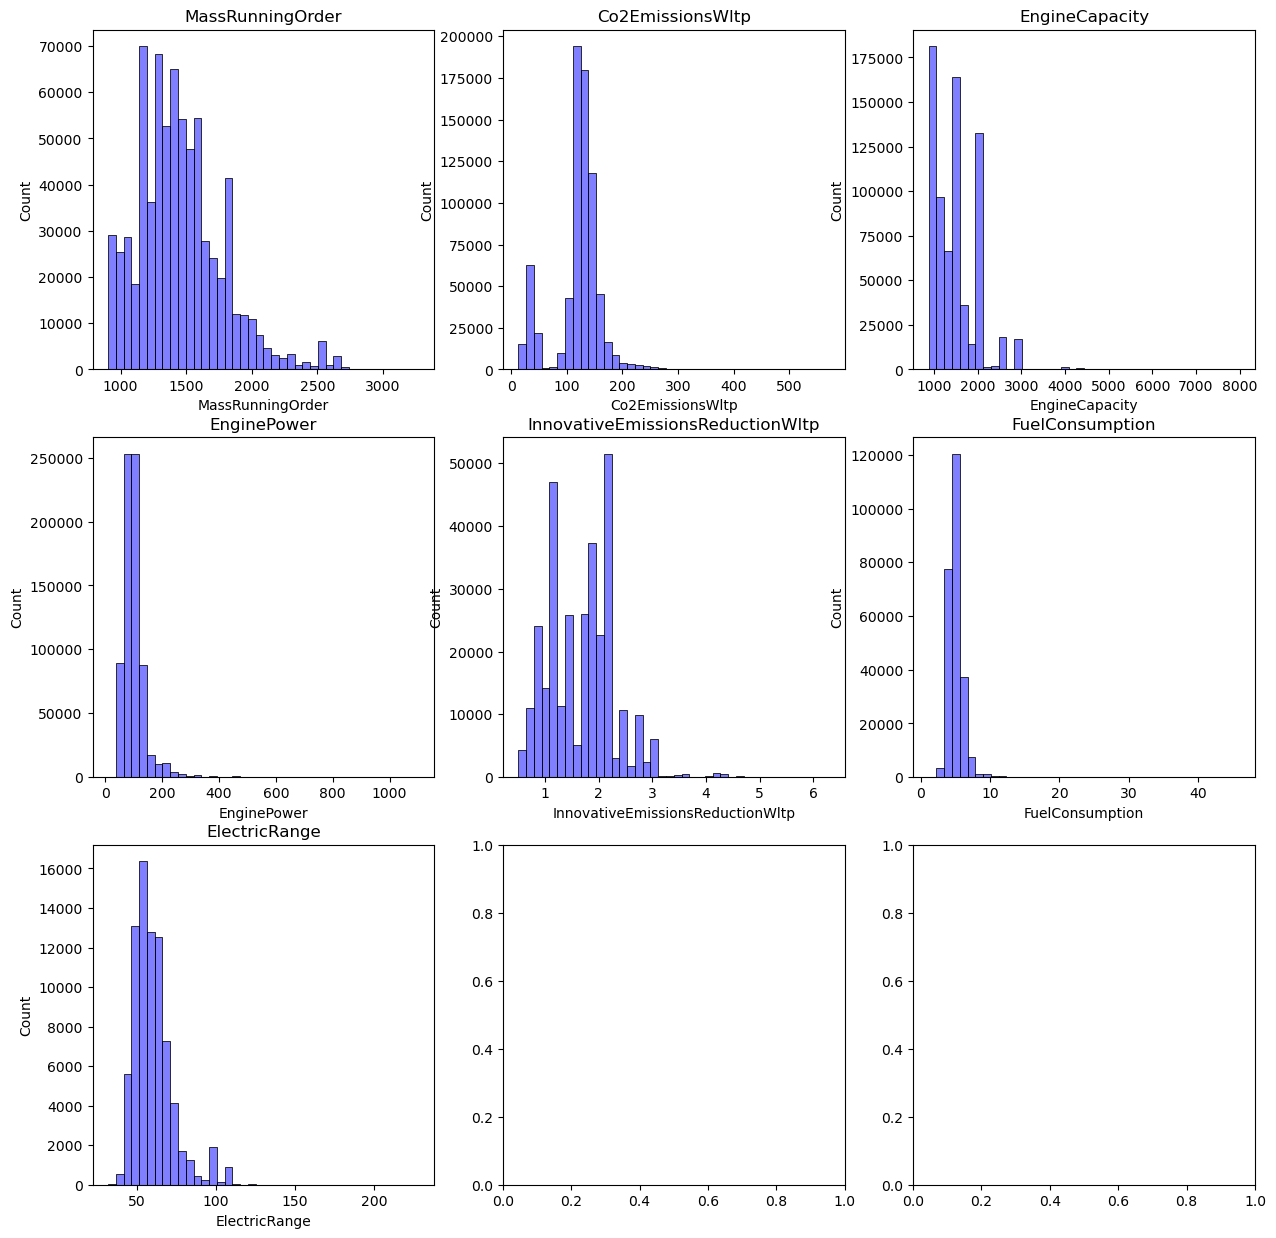

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#sm.dislot(echantillon, fit=True, line='45')
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(['MassRunningOrder', 'Co2EmissionsWltp', 'EngineCapacity', 'EnginePower', 'InnovativeEmissionsReductionWltp', 'FuelConsumption', 'ElectricRange']):
  ax = axes[i]
  sns.histplot(x=df[col], bins=40, color='b',alpha=0.5, ax=ax)
  ax.set_title(col)
# plt.xlim(0, 250)

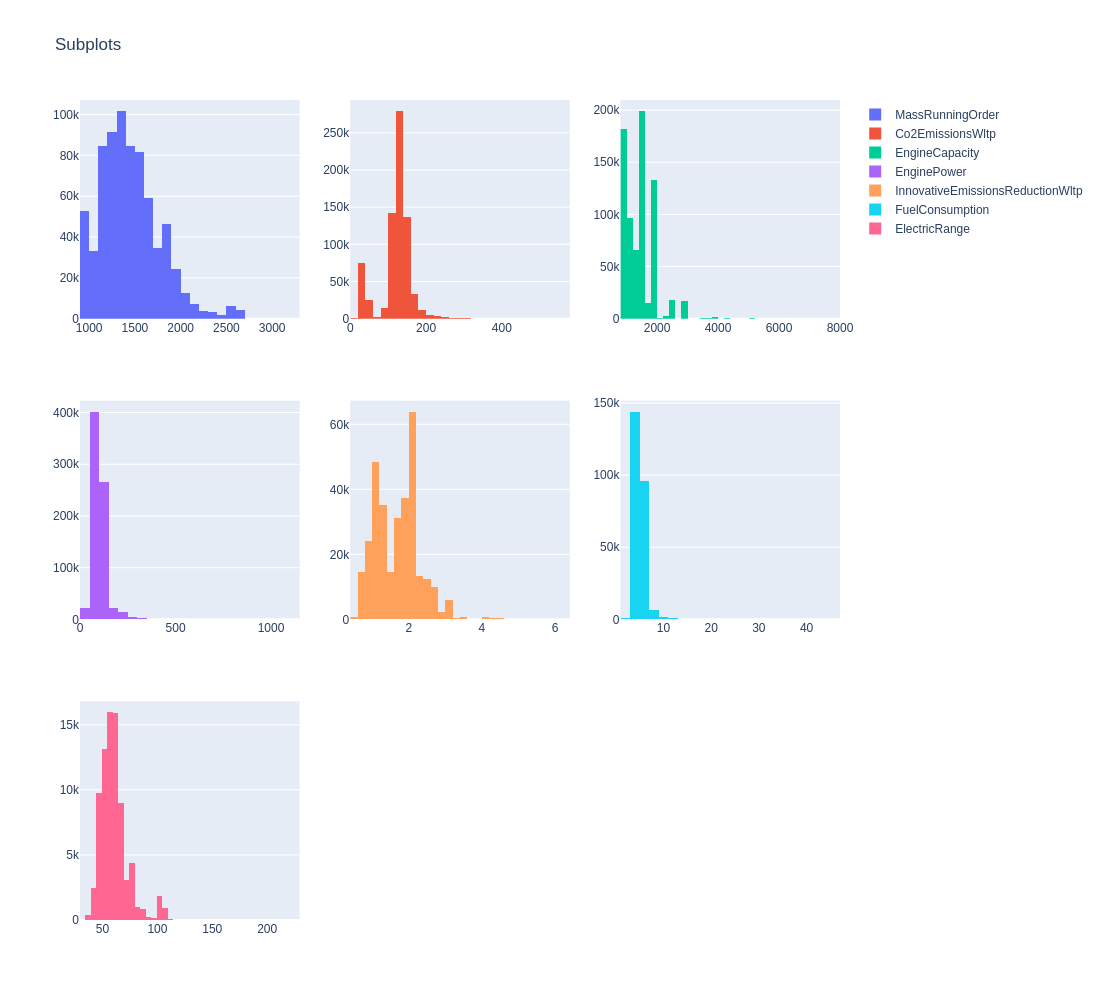

In [ ]:
co2.viz.plot_feature_distributions(df, interactive=False)

In [ ]:
def electricrange_discretization(df, to_dummies=False):
    df['ElectricRange'].fillna(0, inplace=True)

    bins = [-float('inf'),0,50,100,150,300]
    labels = ['NO_RANGE', '0to50', '50to100', '100to150', '150+']
    df['ElectricRange'] = pd.cut(df['ElectricRange'], bins=bins, labels=labels)

    if to_dummies:
        df = df.join(pd.get_dummies(data=df['ElectricRange'], dtype=int, prefix='ElecRange'))
        df.drop('ElectricRange', axis=1, inplace=True)
    
    return df